# Project 1 - FP-Growth
## Zack Azadian
## October 17, 2019

In [1]:
import pandas as pd
import collections
import operator

In [2]:
# final_data = pd.read_csv("f_adult_clean_data.csv", index_col=0)
# test = final_data.iloc[:, [8,13,14] ]
# test.head()
# final_data.head()

In [3]:
data = pd.read_csv("adult.data", header=None)

In [4]:
# clean data - takes 10 minutes and 45 seconds
clean_data = data

# age
for i in range(len(data)):
    clean_data.iloc[i,0] = str(clean_data.iloc[i,0])+'a'

# education number
for i in range(len(data)):
    clean_data.iloc[i,4] = str(clean_data.iloc[i,4])+'en'
    
# capital gain
for i in range(len(data)):
    clean_data.iloc[i,10] = str(clean_data.iloc[i,10])+'cg'
    
# capital loss
for i in range(len(data)):
    clean_data.iloc[i,11] = str(clean_data.iloc[i,11])+'cl'

# hours per week
for i in range(len(data)):
    clean_data.iloc[i,12] = str(clean_data.iloc[i,12])+'hw'

# replace ? with 0
clean_data = clean_data.replace(' ?',0)

# Binning
print('Binning')
for i in range(len(clean_data)):

    if clean_data.iloc[i,2] <= 50000:
        clean_data.iloc[i,2] = '0-50,000'
    elif 50000 < clean_data.iloc[i,2] <= 100000:
        clean_data.iloc[i,2] = '50,000-100,000'

    elif 100000 < clean_data.iloc[i,2] <= 150000:
        clean_data.iloc[i,2] = '100,000-150,000' 

    elif 150000 < clean_data.iloc[i,2] <= 200000:
        clean_data.iloc[i,2] = '150,000-200,000'

    elif 200000 < clean_data.iloc[i,2] <= 250000:
        clean_data.iloc[i,2] = '200,000-250,000'

    elif 250000 < clean_data.iloc[i,2] <= 300000:
        clean_data.iloc[i,2] = '250,000-300,000' 

    elif 300000 < clean_data.iloc[i,2] <= 350000:
        clean_data.iloc[i,2] = '300,000-350,000' 

    elif 350000 < clean_data.iloc[i,2] <= 400000:
        clean_data.iloc[i,2] = '350,000-400,000' 

    else:
        clean_data.iloc[i,2] = '400,000-1,484,705'
        
print('Binning complete')
        
final_data = clean_data

Binning
Binning complete


In [5]:
final_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39a,State-gov,"50,000-100,000",Bachelors,13en,Never-married,Adm-clerical,Not-in-family,White,Male,2174cg,0cl,40hw,United-States,<=50K
1,50a,Self-emp-not-inc,"50,000-100,000",Bachelors,13en,Married-civ-spouse,Exec-managerial,Husband,White,Male,0cg,0cl,13hw,United-States,<=50K
2,38a,Private,"200,000-250,000",HS-grad,9en,Divorced,Handlers-cleaners,Not-in-family,White,Male,0cg,0cl,40hw,United-States,<=50K
3,53a,Private,"200,000-250,000",11th,7en,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0cg,0cl,40hw,United-States,<=50K
4,28a,Private,"300,000-350,000",Bachelors,13en,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0cg,0cl,40hw,Cuba,<=50K


In [6]:
def in_row(item, row_num, data):
    for i in range(data.columns.size):
        if item == data.iloc[row_num, i]:
            return True

In [7]:
class Node:
    
    def __init__(self, key, count, parent=None):
        self.key = key
        self.count = count
        self.children = []
        self.parent = parent
        
    def make_child(self, new_node):
        self.children.append(new_node)
        
    def get_child(self, pos):
        return self.children[pos]
    
    def num_child(self):
        return len(self.children)
        
    def __repr__(self):
        return (f"{self.key}: {self.count} Children: {self.children}")

In [8]:
def Build_Tree(data, c1):
    
    root = Node(None, None)
    node_pos = root
    
    for i in range(len(data)):
        #print('here')
        for j in range(len(c1)):
            check = False
            
            if in_row(c1[j], i, data):
                for k in range(node_pos.num_child()):
                    
                    if c1[j] == node_pos.get_child(k).key:
                        node_pos.get_child(k).count += 1
                        node_pos = node_pos.get_child(k)
                        check=True
                        
                        if j == len(c1)-1:
                            node_pos = root
                        break
                if not check:
                    node_pos.make_child(Node(c1[j],1,node_pos))
                    node_pos = node_pos.get_child(-1)
                    
        node_pos = root
        
    return root

In [9]:
def base_node_gen(root):
    
    base_nodes = []
    
    def mine_base_node(node):
        if node.children == []:
            base_nodes.append(node)
        else:
            for i in node.children:
                mine_base_node(i)
                
    mine_base_node(root)
    
    return base_nodes

In [10]:
def gen_our_nodes(base_nodes, keyval):
    
    our_nodes = []
    
    def gen_node(node, v):
        if node.key == v:
            return node
        elif node.key == None:
            return None
        else:
            return gen_node(node.parent, v)
    
    #key=keyval
    
    for k in keyval:
        for i in base_nodes:
            var = gen_node(i, k)

            if var != None and var not in our_nodes:
                our_nodes.append(var)
            
    return our_nodes

In [11]:
def build_count_c1_list(data, min_sup):
    d_C1 = {}
    
    for i in range(len(data)):
        for j in range(data.columns.size):
            if data.iloc[i,j] not in d_C1:
                d_C1[data.iloc[i,j]] = 1
            else:
                d_C1[data.iloc[i,j]] += 1
                
                
    min_sup_number = len(data)*min_sup
    keys_list = list(d_C1.keys())
    
    # apply minsup
    d_C1_f = {}
    for i in keys_list:
        if int(d_C1[i]) >= min_sup_number:
            d_C1_f[i] = d_C1[i]
    #print("Frequency set length {} with frequency:".format(z),d_C1_f)
    return d_C1_f

In [12]:
from itertools import chain, combinations
def subset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1,len(s)+1))

In [13]:
def final(int_node_list):
    
    final_d = {}
    
    def frequent_pattern(node):
        if node.key != None:
            nlist.append(node.key)
            return frequent_pattern(node.parent)
        elif node.key == None:
            None
        else:
            return frequent_pattern(node.parent)
            
    for node in int_node_list:
        nlist = []
        frequent_pattern(node)

        for sub in subset(nlist):
            flist = sub
            #print(flist)
            
            if flist in final_d.keys():
                final_d[flist] += node.count
            else:
                final_d[flist] = node.count
                
    return final_d

In [14]:
def Z_FP_Growth(data, min_sup):

    # gen, count, and apply minsup on candidate keys
    Lk = build_count_c1_list(data, min_sup)
    #print(Lk)

    # take unordered list with counts that passed minsup and return items from highest to lowest count
    sorted_x = sorted(Lk.items(), key=operator.itemgetter(1), reverse=True)
    ordered = sorted_dict = collections.OrderedDict(sorted_x)
    list_of_keys_descending = list(ordered.keys())
    #print(list_of_keys_descending)

    # build tree called tree - tree shows look at root which has all children and counts
    tree = Build_Tree(data, list_of_keys_descending)
    #print(tree)
    
    # input tree and find list of base nodes
    bnode_list = base_node_gen(tree)
    #print(bnode_list)
    
    # take base nodes and return list of all nodes with their cascade
    # first switch list_of_keys_descending to ascending
    list_of_keys_descending.reverse()
    
    # proceed with generating nodes
    int_nodes = gen_our_nodes(bnode_list, list_of_keys_descending)
    #print(int_nodes)
    
    # take list of all nodes and generate frequent itemset patterns
    return final(int_nodes)
    

In [24]:
Z_FP_Growth(final_data, 0.8)

{(' White',): 27816,
 (' United-States',): 54791,
 ('0cl',): 113633,
 (' White', ' United-States'): 25621,
 (' White', '0cl'): 26470,
 (' United-States', '0cl'): 52140,
 (' White', ' United-States', '0cl'): 24349,
 ('0cg',): 81955,
 (' White', '0cg'): 25407,
 (' United-States', '0cg'): 50068,
 ('0cg', '0cl'): 77711,
 (' White', ' United-States', '0cg'): 23369,
 (' White', '0cg', '0cl'): 24061,
 (' United-States', '0cg', '0cl'): 47417,
 (' White', ' United-States', '0cg', '0cl'): 22097}

In [16]:
import time

In [17]:
start = time.time()

Z_FP_Growth(final_data, 0.9)

end = time.time()

time_taken = end - start
print('Time: ',time_taken)

Time:  13.420400857925415


In [18]:
# randomly sampling 5000 rows from Adult Dataframe to run timing tests
data5k = final_data.sample(n=5000)

In [19]:
start = time.time()

Z_FP_Growth(data5k, 0.5)

end = time.time()

time_taken = end - start
print('Time: ',time_taken)

Time:  4.106703042984009


In [20]:
# generate graphs
minsup = (.5,.6,.7,.8,.9)
ap_full = (14.97, 57.78, 128.28, 306.73, 437.57)
iap_full = (13.95, 57.88, 126.60, 308.39, 411.21)
fp_full = (12.8, 18.45, 21.63, 25.55, 26.06)

a_5 = (2.24, 9.41, 20.14, 47.32, 67.24)
f_5 = (1.99, 2.8, 3.38, 3.96, 4.09)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

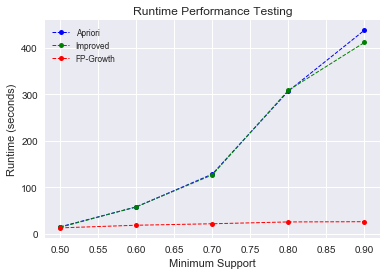

In [22]:
plt.plot(minsup, ap_full, color='b', marker='o', linestyle='dashed', linewidth=1, markersize=5)
plt.plot(minsup, iap_full, color='g', marker='o', linestyle='dashed', linewidth=1, markersize=5)
plt.plot(minsup, fp_full, color='r', marker='o', linestyle='dashed', linewidth=1, markersize=5)
plt.xlabel('Minimum Support')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Performance Testing')
plt.legend((['Apriori','Improved','FP-Growth']),loc=2, fontsize='small')
plt.savefig('FullTest')
plt.show()

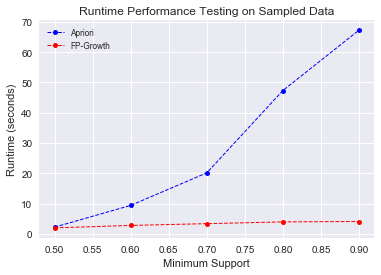

In [23]:
plt.plot(minsup, a_5, color='b', marker='o', linestyle='dashed', linewidth=1, markersize=5)
plt.plot(minsup, f_5, color='r', marker='o', linestyle='dashed', linewidth=1, markersize=5)
plt.xlabel('Minimum Support')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Performance Testing on Sampled Data')
plt.legend((['Apriori','FP-Growth']),loc=2, fontsize='small')
plt.savefig('5kTest')
plt.show()